In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('/content/IMDB Dataset.csv',engine="python",error_bad_lines=False)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


**Text normalization**

In [23]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing special characters**

In [24]:
#function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#function on review column
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'so', 'before', 'weren', 've', 'ourselves', 'won', 's', "you're", 'against', 'ain', 'while', "should've", 'mustn', 'few', 'or', 'didn', 'ours', 'then', 'aren', 'under', 'them', 'here', 'own', "you'll", 'now', 'is', 'both', 'couldn', 're', 'does', 'how', 'all', 'only', "hasn't", "hadn't", 'it', 'what', 'between', 'with', 'did', 't', 'there', 'their', 'd', 'be', 'about', 'do', 'why', "haven't", 'because', 'has', 'doing', 'that', 'she', 'we', 'which', 'hasn', 'and', 'those', 'were', 'y', 'as', 'the', 'each', 'shouldn', 'he', 'over', 'you', 'same', 'yours', 'doesn', "won't", 'again', 'hadn', 'our', 'yourself', "it's", "mightn't", 'can', "doesn't", 'wouldn', 'too', 'below', 'have', 'at', 'its', 'they', 'don', 'am', 'isn', 'll', 'further', 'ma', "needn't", 'than', 'whom', "shouldn't", 'myself', 'not', 'most', "don't", 'him', "didn't", 'out', 'my', 'for', "couldn't", 'until', 'themselves', "weren't", "aren't", 'such', "you've", 'down', 'himself', 'any', 'to', 'on', 'theirs', 'other', 'having

In [26]:
#Count vectorizer for bag of words
y=np.array(df.sentiment.values)
cv=CountVectorizer(max_features=5000)
#transformed train reviews
x=cv.fit_transform(df.review).toarray()
print(x.shape,y.shape)


#doc2vec



(50000, 5000) (50000,)


In [ ]:
word_frequency = pd.Series(' '.join(df['review']).split()).value_counts()
print(word_frequency)

movie               82310
film                73514
one                 46301
like                37483
good                27403
                    ...  
histerically            1
popstarplayed           1
TVAside                 1
murdersAlthough         1
BrotherMeanwhile        1
Length: 256143, dtype: int64


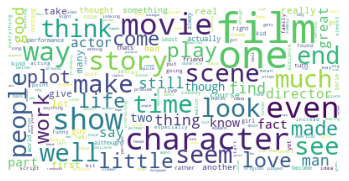

In [ ]:
from PIL import Image
from wordcloud import WordCloud
corpus = list(df['review'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=123)
print(xtrain.shape,xtest.shape, ytrain.shape,ytest.shape)

(538, 5000) (231, 5000) (538,) (231,)


**random forest** **technique**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
sv=SVC()                                    #SupportVectorClassifier
rf=RandomForestClassifier()                 #RandomForestClassifier


In [ ]:

rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
rf.fit(xtrain, ytrain)
predict_rf=rf.predict(xtest)
rf_score=accuracy_score(ytest,predict_rf)
print("rf_score :",rf_score)
print("--Accuracy-->", accuracy_score(ytest,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(ytest,predict_rf))

rf_score : 0.8458666666666667
--Accuracy--> 0.8458666666666667
--ConfuMat-->
 
 [[6359 1110]
 [1202 6329]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.85      0.85      7469
    positive       0.85      0.84      0.85      7531

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [8]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=29)
print(x_train.shape,x_test.shape, y_train.shape,ytest.shape)

(538, 5000) (231, 5000) (538,) (231,)


In [ ]:
                              
rf=RandomForestClassifier()                 #RandomForestClassifier

rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("rf_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))


svm_score : 0.84
--Accuracy--> 0.84
--ConfuMat-->
 
 [[6369 1156]
 [1244 6231]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.85      0.84      7525
    positive       0.84      0.83      0.84      7475

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

In [ ]:
                             
rf=RandomForestClassifier()                 #RandomForestClassifier

rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("rf_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))

svm_score : 0.8473333333333334
--Accuracy--> 0.8473333333333334
--ConfuMat-->
 
 [[6419 1102]
 [1188 6291]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.85      0.85      7521
    positive       0.85      0.84      0.85      7479

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)
rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("svm_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))

svm_score : 0.8408666666666667
--Accuracy--> 0.8408666666666667
--ConfuMat-->
 
 [[6413 1182]
 [1205 6200]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.84      0.84      7595
    positive       0.84      0.84      0.84      7405

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=20)
rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("rf_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))

svm_score : 0.8468
--Accuracy--> 0.8468
--ConfuMat-->
 
 [[6417 1129]
 [1169 6285]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7546
    positive       0.85      0.84      0.85      7454

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=30)
rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("rf_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))

svm_score : 0.8450666666666666
--Accuracy--> 0.8450666666666666
--ConfuMat-->
 
 [[6309 1165]
 [1159 6367]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.84      0.84      7474
    positive       0.85      0.85      0.85      7526

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



**Linear regression Modelling the dataset**

In [ ]:
#training the model

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=123,solver='lbfgs')
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
print(lr_bow)


LogisticRegression(C=1, max_iter=500, random_state=123)


**Logistic regression model performane on test dataset**

In [ ]:
#Predicting the model for bag of words
lr_predict=lr.predict(xtest)
print(lr_predict)


['negative' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)


lr_bow_score : 0.8691333333333333


In [ ]:
#Classification report for bag of words 
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,random_state=29,C=1,solver='lbfgs')
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))


lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
lr=LogisticRegression(penalty='l1',max_iter=1000,random_state=29,C=4,solver='liblinear')
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))


lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=200,random_state=1)
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=200,random_state=10)
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=200,random_state=20)
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=200,random_state=30)
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

lr_bow_score : 0.8691333333333333
--Accuracy--> 0.8691333333333333
--ConfuMat-->
 
 [[6449 1020]
 [ 943 6588]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.87      0.86      0.87      7469
    positive       0.87      0.87      0.87      7531

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



**Multinomial Naive Bayes for bag of words and tfidf features**

In [ ]:
#training the model
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(xtrain,ytrain)
print(Nb_bow)


MultinomialNB()


In [ ]:
#Predicting the model for bag of words
nb_predict=Nb.predict(xtest)
print(nb_predict)

['negative' 'positive' 'positive' ... 'positive' 'positive' 'negative']


In [ ]:
#Accuracy score for bag of words
nb_score=accuracy_score(ytest,nb_predict)
print("nb_score :",nb_score)

nb_score : 0.8444666666666667


In [ ]:
print("--Accuracy-->", accuracy_score(ytest,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,nb_predict))

--Accuracy--> 0.8444666666666667
--ConfuMat-->
 
 [[6330 1139]
 [1194 6337]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.85      0.84      7469
    positive       0.85      0.84      0.84      7531

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=29)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))


(35000, 5000) (15000, 5000) (35000,) (15000,)
nb_score : 0.8508666666666667
--Accuracy--> 0.8508666666666667
--ConfuMat-->
 
 [[6429 1096]
 [1141 6334]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7525
    positive       0.85      0.85      0.85      7475

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))

(35000, 5000) (15000, 5000) (35000,) (15000,)
nb_score : 0.8495333333333334
--Accuracy--> 0.8495333333333334
--ConfuMat-->
 
 [[6423 1098]
 [1159 6320]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7521
    positive       0.85      0.85      0.85      7479

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))


nb_score : 0.8498666666666667
--Accuracy--> 0.8498666666666667
--ConfuMat-->
 
 [[6461 1134]
 [1118 6287]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7595
    positive       0.85      0.85      0.85      7405

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=20)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))

nb_score : 0.8476
--Accuracy--> 0.8476
--ConfuMat-->
 
 [[6432 1114]
 [1172 6282]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7546
    positive       0.85      0.84      0.85      7454

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=30)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))

nb_score : 0.8444
--Accuracy--> 0.8444
--ConfuMat-->
 
 [[6309 1165]
 [1169 6357]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.84      0.84      7474
    positive       0.85      0.84      0.84      7526

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.7216
--ConfuMat-->
 
 [[5405 2069]
 [2107 5419]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.72      0.72      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:

clf = DecisionTreeClassifier(random_state=29)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.7239333333333333
--ConfuMat-->
 
 [[5384 2090]
 [2051 5475]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.73      0.73      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:

clf = DecisionTreeClassifier(random_state=1)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.7216666666666667
--ConfuMat-->
 
 [[5354 2120]
 [2055 5471]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.73      0.72      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:
clf = DecisionTreeClassifier(random_state=10)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.723
--ConfuMat-->
 
 [[5377 2097]
 [2058 5468]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.73      0.72      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:
clf = DecisionTreeClassifier(random_state=20)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.7246
--ConfuMat-->
 
 [[5394 2080]
 [2051 5475]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.73      0.73      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:
clf = DecisionTreeClassifier(random_state=30)
clf_bow=clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_score=accuracy_score(y_test,clf_predict)
print("clf_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,clf_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,clf_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,clf_predict))

clf_score : 0.8444
--Accuracy--> 0.7198
--ConfuMat-->
 
 [[5384 2090]
 [2113 5413]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.72      0.72      0.72      7474
    positive       0.72      0.72      0.72      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [ ]:
from pandas.core.common import random_state
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.6192
--Accuracy--> 0.6192
--ConfuMat-->
 
 [[4845 2680]
 [3032 4443]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.62      0.64      0.63      7525
    positive       0.62      0.59      0.61      7475

    accuracy                           0.62     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.62      0.62      0.62     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=29)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.6136
--Accuracy--> 0.6136
--ConfuMat-->
 
 [[5850 1675]
 [4121 3354]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.59      0.78      0.67      7525
    positive       0.67      0.45      0.54      7475

    accuracy                           0.61     15000
   macro avg       0.63      0.61      0.60     15000
weighted avg       0.63      0.61      0.60     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.6020666666666666
--Accuracy--> 0.6020666666666666
--ConfuMat-->
 
 [[5537 1984]
 [3985 3494]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.58      0.74      0.65      7521
    positive       0.64      0.47      0.54      7479

    accuracy                           0.60     15000
   macro avg       0.61      0.60      0.59     15000
weighted avg       0.61      0.60      0.59     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)
neigh = KNeighborsClassifier(n_neighbors=7)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.6158
--Accuracy--> 0.6158
--ConfuMat-->
 
 [[4929 2666]
 [3097 4308]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.61      0.65      0.63      7595
    positive       0.62      0.58      0.60      7405

    accuracy                           0.62     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.62      0.62      0.62     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=20)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.6056666666666667
--Accuracy--> 0.6056666666666667
--ConfuMat-->
 
 [[5632 1914]
 [4001 3453]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.58      0.75      0.66      7546
    positive       0.64      0.46      0.54      7454

    accuracy                           0.61     15000
   macro avg       0.61      0.60      0.60     15000
weighted avg       0.61      0.61      0.60     15000



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=30)
neigh = KNeighborsClassifier(n_neighbors=15)
neigh_bow=neigh.fit(x_train,y_train)
neigh_predict=neigh.predict(x_test)
neigh_score=accuracy_score(y_test,neigh_predict)
print("neigh_score :",neigh_score)
print("--Accuracy-->", accuracy_score(y_test,neigh_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,neigh_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,neigh_predict))

neigh_score : 0.669
--Accuracy--> 0.669
--ConfuMat-->
 
 [[4194 3280]
 [1685 5841]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.71      0.56      0.63      7474
    positive       0.64      0.78      0.70      7526

    accuracy                           0.67     15000
   macro avg       0.68      0.67      0.66     15000
weighted avg       0.68      0.67      0.67     15000



In [ ]:
!pip install matplotlib

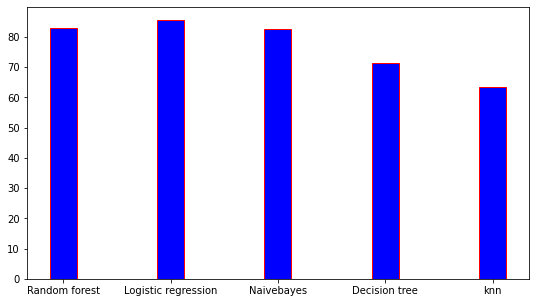

In [ ]:
# Importing the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5))

c = ['Random forest', 'Logistic regression', 'Naivebayes', 'Decision tree', 'knn']

a= [82.8, 85.6, 82.7, 71.4, 63.5]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(c, a,width= 0.25, align='center',color='blue', edgecolor = 'red')
# Displaying the bar plot
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['score']= df['review'].apply(lambda review: analyser.polarity_scores(review))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#df.drop_duplicates(subset =”review”, keep = “first”, inplace = True)
df['review'] = df['review'].astype('str')
def get_polarity(text):
  
  return TextBlob(text).sentiment.polarity
df['Polarity'] = df['review'].apply(get_polarity)

In [ ]:

df['compound'] = df['score'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()
df.drop(['score'],axis=1)

,review,sentiment,Polarity,compound,sentiment_type
0,One reviewers mentioned watching 1 Oz episode ...,positive,0.025587,-0.9945,NEGATIVE
1,wonderful little production filming technique ...,positive,0.127604,0.9582,POSITIVE
2,thought wonderful way spend time hot summer we...,positive,0.264732,0.9520,POSITIVE
3,Basically theres family little boy Jake thinks...,negative,-0.060937,-0.9117,NEGATIVE
4,Petter Matteis Love Time Money visually stunni...,positive,0.239534,0.9871,POSITIVE
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,0.402591,0.9762,POSITIVE
49996,Bad plot bad dialogue bad acting idiotic direc...,negative,-0.322222,-0.9320,NEGATIVE
49997,Catholic taught parochial elementary schools n...,negative,0.056984,-0.9074,NEGATIVE
49998,Im going disagree previous comment side Maltin...,negative,-0.042725,-0.5267,NEGATIVE


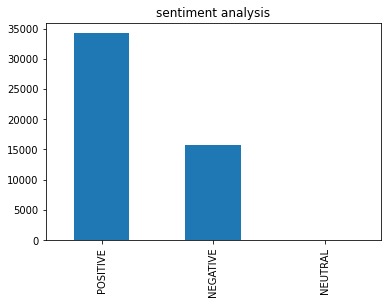

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

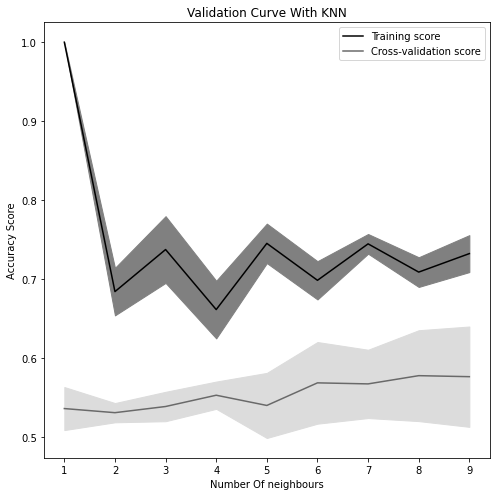

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                  x,y, param_name="n_neighbors", param_range=param_range,cv=3, scoring="accuracy")
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With KNN")
plt.xlabel("Number Of neighbours")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

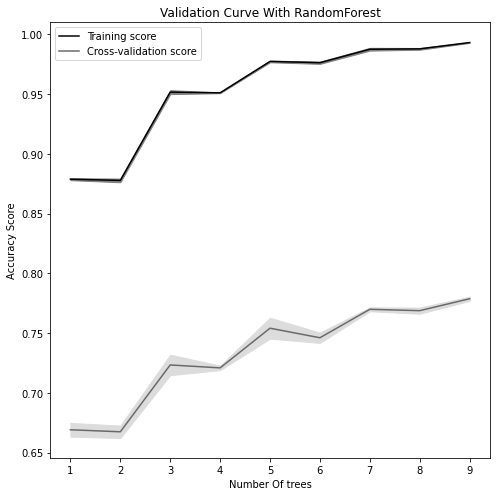

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                  x, y, param_name="n_estimators", param_range=param_range,cv=3, scoring="accuracy")
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With RandomForest")
plt.xlabel("Number Of trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()